In [1]:
import os
import pandas as pd
os.getcwd()
os.chdir("C:\\Users\\ana24007\\Downloads")

dados=pd.read_csv("data_xy.txt")
print(dados)



      300.0  0.072
0     301.0  0.072
1     302.0  0.071
2     303.0  0.072
3     304.0  0.071
4     305.0  0.070
..      ...    ...
995  1296.0  0.001
996  1297.0  0.001
997  1298.0  0.001
998  1299.0  0.001
999  1300.0  0.001

[1000 rows x 2 columns]


Estimativas iniciais: [0.155, 780.0, 72.24091638399945, 0]


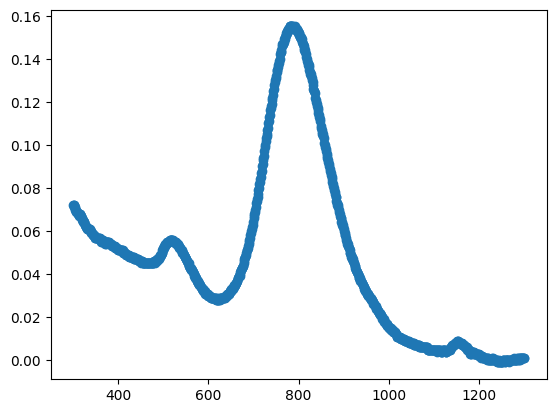

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# importando os dados
x= np.loadtxt('data_xy.txt',delimiter=",", usecols=0)
y= np.loadtxt('data_xy.txt',delimiter=",",usecols=1)

## plotando os dados
plt.plot(x,y,'-o')
def estimativa_inicial_gaussiana(x, y,c=0,a=4):
    # Encontrar o índice do valor máximo da absorbância
    idx_max_absorbancia = np.argmax(y)
    
    # Estimar a amplitude do pico (amp)
    amp = y[idx_max_absorbancia]
    
    # Estimar a média do pico (mu)
    mu = x[idx_max_absorbancia]
    
    # Estimar o desvio padrão do pico (sig)
    # Usando a dispersão dos comprimentos de onda ao redor do valor máximo da absorbância
    sig = np.std(x) / a  # Valor arbitrário, pode ser ajustado conforme necessário
    
    # Escolher um valor inicial para o termo de offset (c)
    c  # Valor inicial arbitrário, pode ser ajustado conforme necessário
    
    # Retornar a lista de parâmetros iniciais [amp, mu, sig, c]
    return [amp, mu, sig, c]



initial_guess_peak = estimativa_inicial_gaussiana(x, y)
print("Estimativas iniciais:", initial_guess_peak)


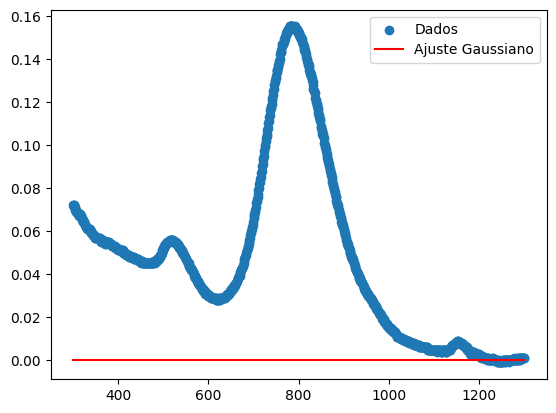

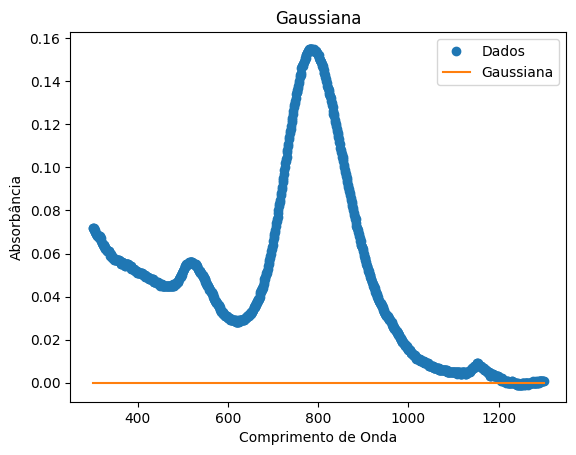

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# importando os dados
x= np.loadtxt('data_xy.txt',delimiter=",", usecols=0)
y= np.loadtxt('data_xy.txt',delimiter=",",usecols=1)

def plot_gaussian(x, y,label=None):
    '''Plota uma gaussiana com base nos dados de absorbância e comprimento de onda.'''
    
    initial_guess = estimativa_inicial_gaussiana(x, y)
    amp=initial_guess[0]
    mu=initial_guess[1]
    sig=initial_guess[2]
    c=initial_guess[3]
    
    def gaussian(x, amp, mu, sig, c):
        return c + amp * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    
    gaussian_values = c + amp * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    
    y_gaussian=gaussian(y,amp, mu, sig, c)
    
    popt, pcov = curve_fit(gaussian, x, y_gaussian, p0=initial_guess)

    # Plotar os dados e a curva ajustada
    plt.scatter(x, y, label='Dados')
    plt.plot(x, gaussian(x, *popt), label='Ajuste Gaussiano', color='red')
    plt.legend()
    plt.show()
    
    plt.plot(x, y, 'o', label='Dados')  # Plota os dados originais
    plt.plot(x, y_gaussian, label=label)  # Plota a gaussiana
    plt.xlabel('Comprimento de Onda')
    plt.ylabel('Absorbância')
    plt.legend()
    plt.title('Gaussiana')
    plt.show()

plot_gaussian(x, y,label='Gaussiana')


In [19]:
initial_guess = estimativa_inicial_gaussiana(x, y)
amp=initial_guess[0]
mu=initial_guess[1]
sig=initial_guess[2]
c=initial_guess[3]
    
print (amp, mu,sig,c, sep=" , ")

def gaussian(x, amp, mu, sig, c):
    return c + amp * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    
y_gaussian=gaussian(y,amp, mu, sig, c)
    
#popt, pcov = curve_fit(gaussian_values, x, y_gaussian, p0=initial_guess)


print("\n")
print(y_gaussian)
                                                            
popt, pcov = curve_fit(gaussian_values, x, y, p0=initial_guess)

print("\n")
print(popt)
print("\n")
#print(pcov)

0.155 , 780.0 , 72.24091638399945 , 0


[7.58678327e-27 7.58678327e-27 7.58564953e-27 ... 7.50670372e-27
 7.50670372e-27 7.50670372e-27]


TypeError: 'numpy.ndarray' object is not callable

In [21]:
x= np.loadtxt('data_xy.txt',delimiter=",", usecols=0)
y= np.loadtxt('data_xy.txt',delimiter=",",usecols=1)
print(x)
print(y)

[ 300.  301.  302. ... 1298. 1299. 1300.]
[0.072 0.072 0.071 ... 0.001 0.001 0.001]


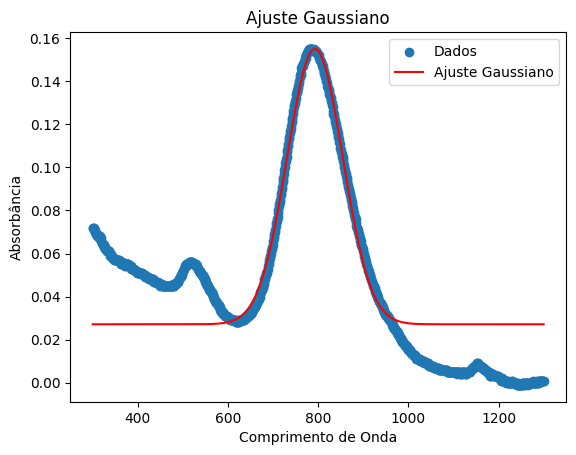

Parametros da guassiana:
amp=0.155
mu=780.0
sig=72.24091638399945
c=0


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Função para estimar os parâmetros iniciais da gaussiana
def estimativa_inicial_gaussiana(x, y):
    amp = np.max(y) - np.min(y)
    mu = x[np.argmax(y)]
    sig = np.std(x)
    c = np.min(y)
    return [amp, mu, sig, c]

# Função gaussiana
def gaussian(x, amp, mu, sig, c):
    return c + amp * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# Função para plotar a gaussiana
def plot_gaussian(x, y, label=None):
    initial_guess = estimativa_inicial_gaussiana(x, y)
    
    popt, pcov = curve_fit(gaussian, x, y, p0=initial_guess)

    # Plotar os dados e a curva ajustada
    plt.scatter(x, y, label='Dados')
    plt.plot(x, gaussian(x, *popt), label='Ajuste Gaussiano', color='red')
    plt.xlabel('Comprimento de Onda')
    plt.ylabel('Absorbância')
    plt.legend()
    plt.title('Ajuste Gaussiano')
    plt.show()
    print("Parametros da guassiana:",f"amp={amp}",f"mu={mu}",f"sig={sig}",f"c={c}",sep="\n")
    
#     # Plotar os dados e a gaussiana inicial (com estimativa inicial)
#     plt.plot(x, y, 'o', label='Dados')  # Plota os dados originais
#     plt.plot(x, gaussian(x, *initial_guess), label='Estimativa Inicial', color='blue')  # Plota a gaussiana inicial
#     plt.xlabel('Comprimento de Onda')
#     plt.ylabel('Absorbância')
#     plt.legend()
#     plt.title('Estimativa Inicial da Gaussiana')
#     plt.show()

# Carregar os dados
x = np.loadtxt('data_xy.txt', delimiter=",", usecols=0)
y = np.loadtxt('data_xy.txt', delimiter=",", usecols=1)

# Chamar a função para plotar a gaussiana
plot_gaussian(x, y, label='Gaussiana')
